Exploratory data analysis of Titanic dataset using Jupyter notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections 

read the file containing passenger information and clean it

In [3]:
df = pd.read_excel("train.xlsx")
df.columns = ["PassengerId","Survived",	"Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df = df.drop(index = 0)
df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


calculate the number of passengers who survived and show the data graphically

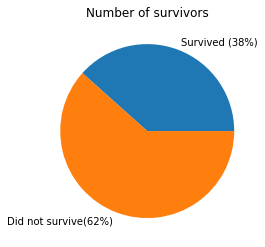

In [4]:
sorted_df = df.groupby(['Survived']).size()
survived = (sorted_df[1]/df.shape[0])*100          #percentage of passengers who survived
n_survived = (sorted_df[0]/df.shape[0])*100        #percentage of passengers who did not survive

mylabels = ["Survived ({a}%)".format(a = round(survived)), "Did not survive({b}%)".format(b = round(n_survived))]
plot_data = np.array([survived, n_survived])
plt.title("Number of survivors")
plt.pie(plot_data, labels = mylabels)
plt.show()


compare the number of male and female passengers who survived

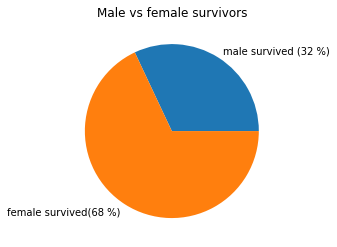

In [5]:
new_df = df.groupby(['Survived', 'Sex']).size()
male_survived = round((new_df[1].male/sorted_df[1])*100)
female_survived = round((new_df[1].female/sorted_df[1])*100)
new_plotdata = np.array([male_survived, female_survived])
mylabels = ['male survived ({a} %)'.format(a = male_survived), 'female survived({b} %)'.format(b = female_survived)]
plt.title("Male vs female survivors")
plt.pie(new_plotdata, labels = mylabels)
plt.show()


Compare number of passengers survived with their class

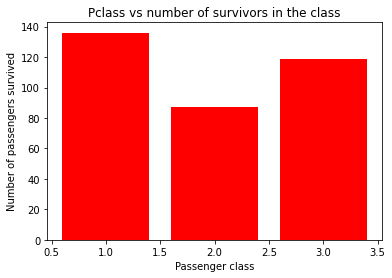

In [6]:
df_series = df.groupby(['Pclass', 'Survived']).size()
df_series.head()
X = np.array([i for i in range(1, 4)])
Y = np.array([df_series[i][1] for i in range(1, 4)])
plt.bar(X, Y, color = 'red')
plt.title("Pclass vs number of survivors in the class")
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers survived")
plt.show()

Compare the number of passengers survived and their age

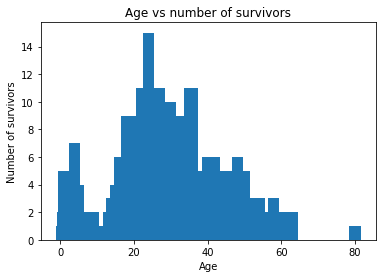

In [7]:
new_data = df[df['Survived']==1]
s_age = new_data['Age']
s_age.dropna()
c = dict(collections.Counter(s_age))
ns = list(c.values())
age = list(c.keys())
ns = np.array(ns)
age = np.array(age)
plt.bar(age, ns, width = 3)
plt.title("Age vs number of survivors")
plt.xlabel("Age")
plt.ylabel("Number of survivors")
plt.show()



Compare the number of passengers survived with their embark

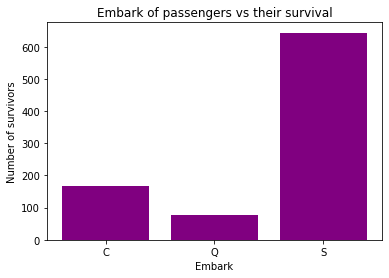

In [8]:
embark_data = df.groupby("Embarked").size()
X = np.array(embark_data.index)
Y = np.array(embark_data)
plt.xlabel("Embark")
plt.ylabel("Number of survivors")
plt.title("Embark of passengers vs their survival")
plt.bar(X, Y, color = 'purple')
plt.show()
